<a href="https://colab.research.google.com/github/Dany511/Bike_Demand_Prediction/blob/main/Bike_Prediction_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

## **Import Libraries**

In [55]:
import pandas as pd   #Data analysis and manipulation library
import math  #Used for mathematical functions
import numpy as np  #Used for working with arrays
import seaborn as sns #Used for data visualization
import matplotlib.pyplot as plt #Used for data visualization
%matplotlib inline 
from sklearn.preprocessing import LabelEncoder,StandardScaler # Machine learning library
from sklearn.model_selection import train_test_split
import warnings # Used to avoid warning messages
warnings.filterwarnings('ignore')

## **Load the Dataset**

In [56]:
df=pd.read_csv("SeoulBikeData.csv",encoding= 'unicode_escape')
# .head() function gives the preview of the data
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [57]:
# Data shape
df.shape

(8760, 14)

In [58]:
# info() function is used to get information abouts the dataframe eg : Number of columns, Datatype of columns and Presence of NUll values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

### There are 9 Numerical and 4 Categorical variables in the dataset

In [59]:
# Descriptive summary of the dataset
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### For 'Rented Bike Count', 'Solar Radiation' , 'Temperature' etc the mean is greater than the median so the distribution is Right skewed and may contain Outliers. Lets check that out in the EDA part

## **Preprocessing the data**

## Check and Handle NULL values

In [60]:
# Check the Null values in the dataframe
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

### There are no NULL values present in any of the columns

In [61]:
# Check duplicated values
df.duplicated().sum()

0

In [62]:
# Convert 'date' column to datetime format 
df['Date']=pd.to_datetime(df['Date'])
# Create seperate column for Day ,Month and Year
df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year

In [63]:
# Drop the date column 
df=df.drop('Date',axis=1)

In [64]:
# Create new column with  name 'label_day_night' and the store the day and night values 
df['label_day_night']=df['Hour'].apply(lambda x : 'Night' if (x >19 or x<5) else( 'Day'))

## **Exploratory Data Analysis**

## Outlier Detection

In [65]:
# Make list of all numerical columns
numerical_columns=list(df.select_dtypes(['int64','float64']).columns)
numerical_columns

['Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Day',
 'Month',
 'Year']

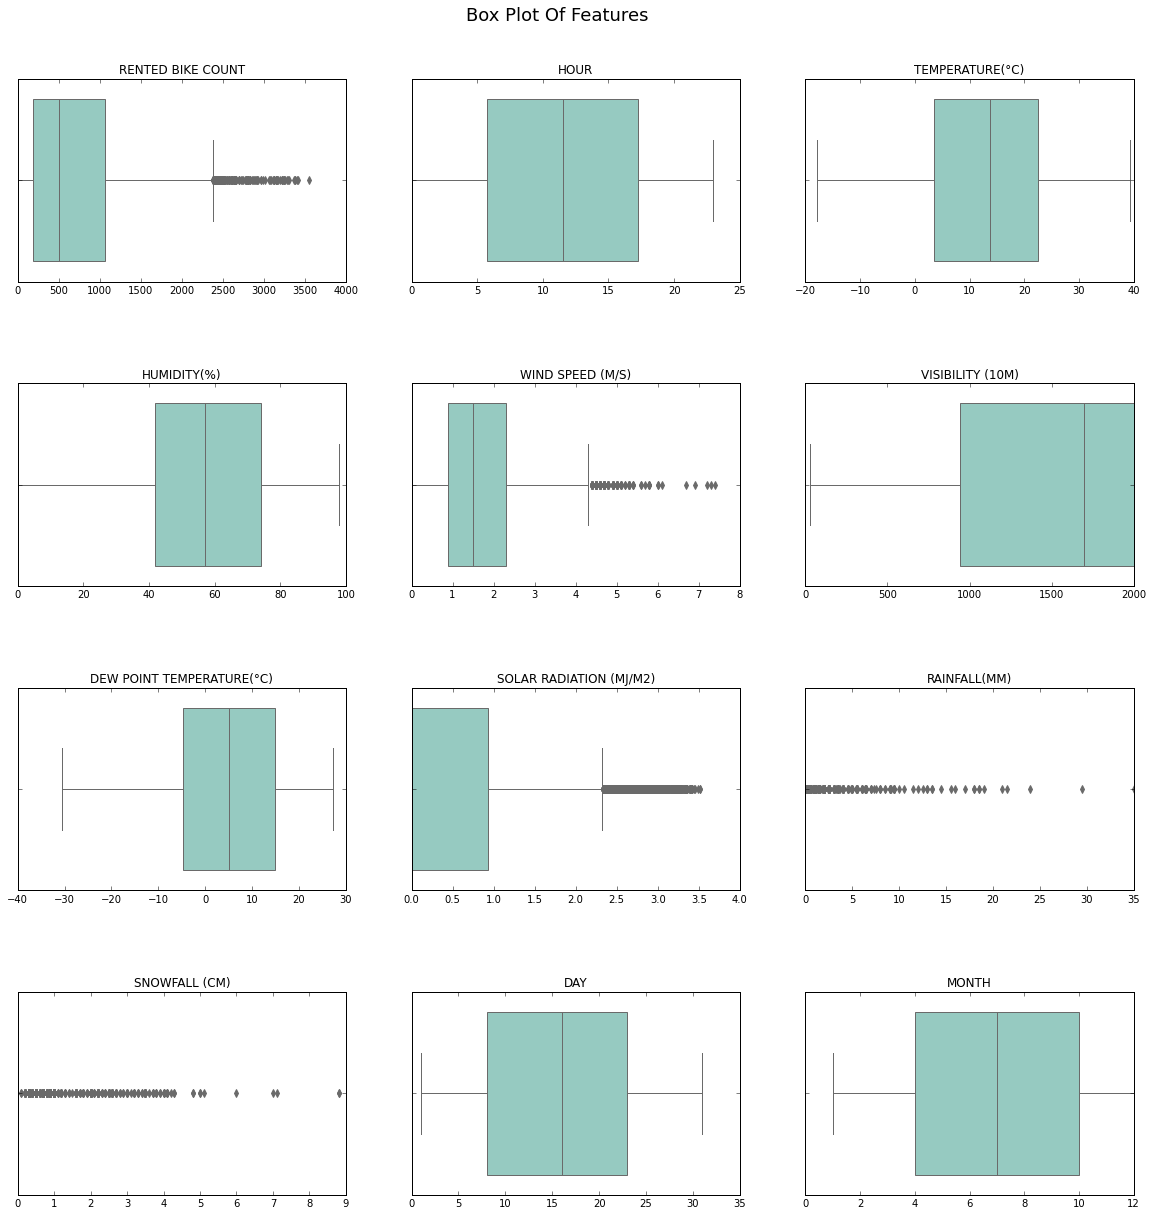

In [66]:
# define subplot grid
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Box Plot Of Features", fontsize=18, y=0.95)

# loop through numerical_columns and axes
for col, ax in zip(numerical_columns, axs.ravel()):
    # filter df for column and plot on specified axes
    sns.boxplot(df[col],ax=ax,palette="Set3")

    # chart formatting
    ax.set_title(col.upper())
    ax.set_xlabel("")

plt.show()

### When we observe the box plots above we can see that columns 'Rented Bike Count' , 'Wind Speed' , 'Solar Radiation' and 'Rainfall' but the values may not be necessarily Outliers 

### 'Rented Bike Count' may have significantly large values when there is huge demand during office hours and  weekends

### 'Wind Speed' , 'Solar Radiation' and 'Rainfall' may have large values depending on the season. Solar Radiation can be high in Summer but low in winter. Same with case of Windspeed and Rainfall

### So I don't worry about outliers in the data

## Univariate Analysis

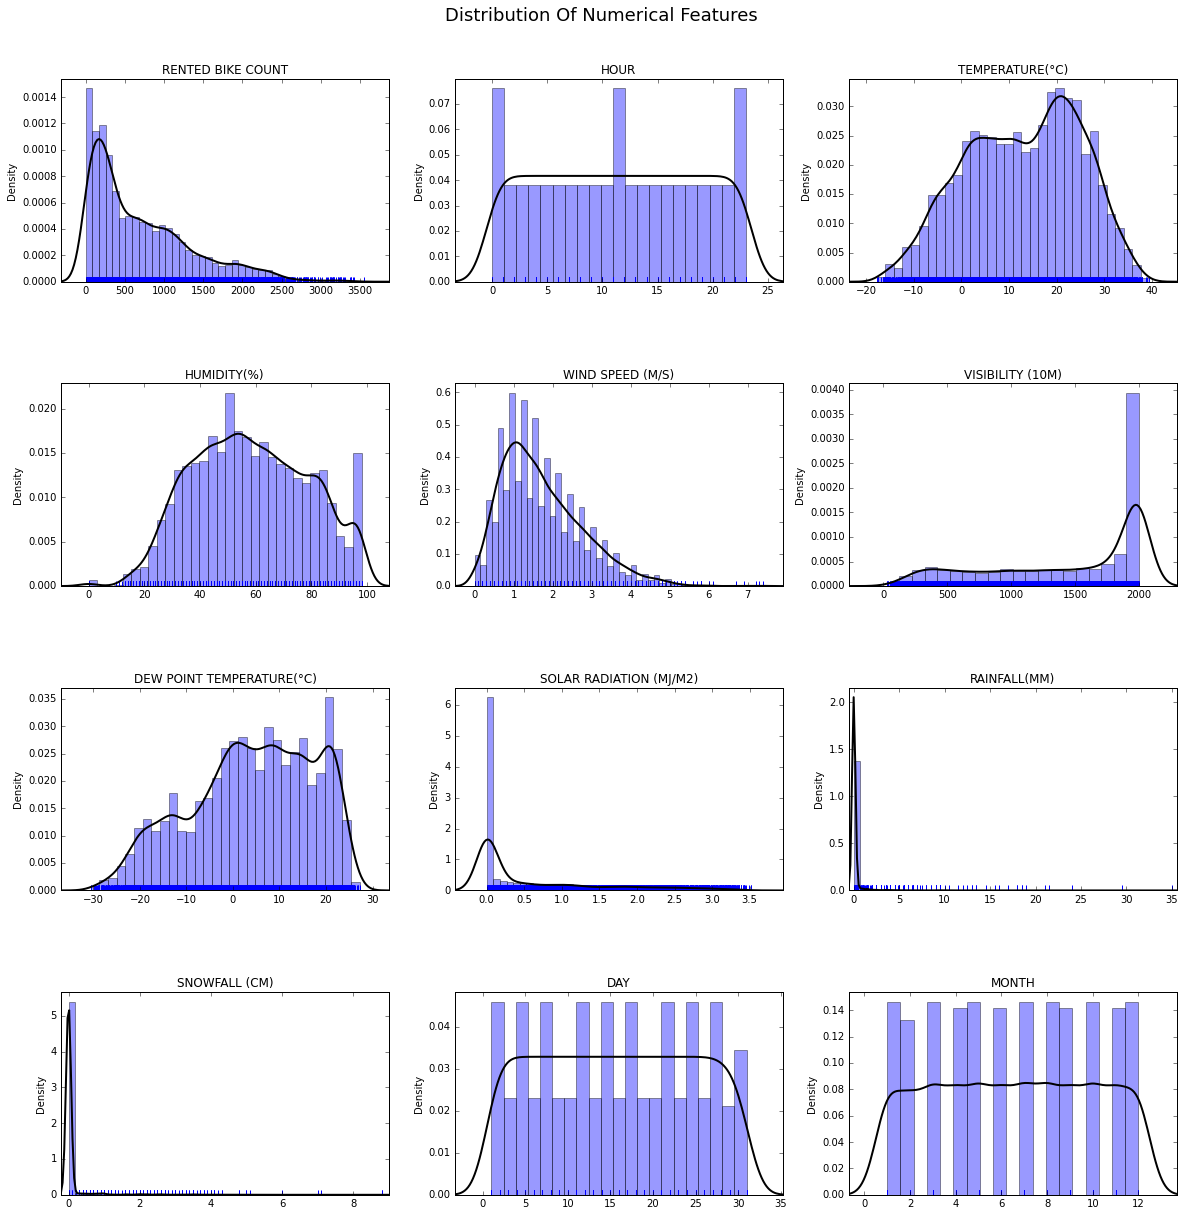

In [67]:
# define subplot grid
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Distribution Of Numerical Features", fontsize=18, y=0.95)

# loop through numerical_columns and axes
for col, ax in zip(numerical_columns, axs.ravel()):
    # filter df for column and plot on specified axes
    sns.distplot(x=df[col],ax=ax,rug=True, rug_kws={"color": "b"},kde_kws={"color": "k", "lw": 2, "label": "KDE"})

    # chart formatting
    ax.set_title(col.upper())
    ax.set_xlabel("")

plt.show()

### The Distribution of 'Rented Bike Count' is Right (Positively) skewed. we will apply transformation and make the distribution close to Normal distribution

### The Distribution of Temperature, Humidity , Windspeed and Solar Radiation are pretty close to Normal distribution


## Correlation Heatmap

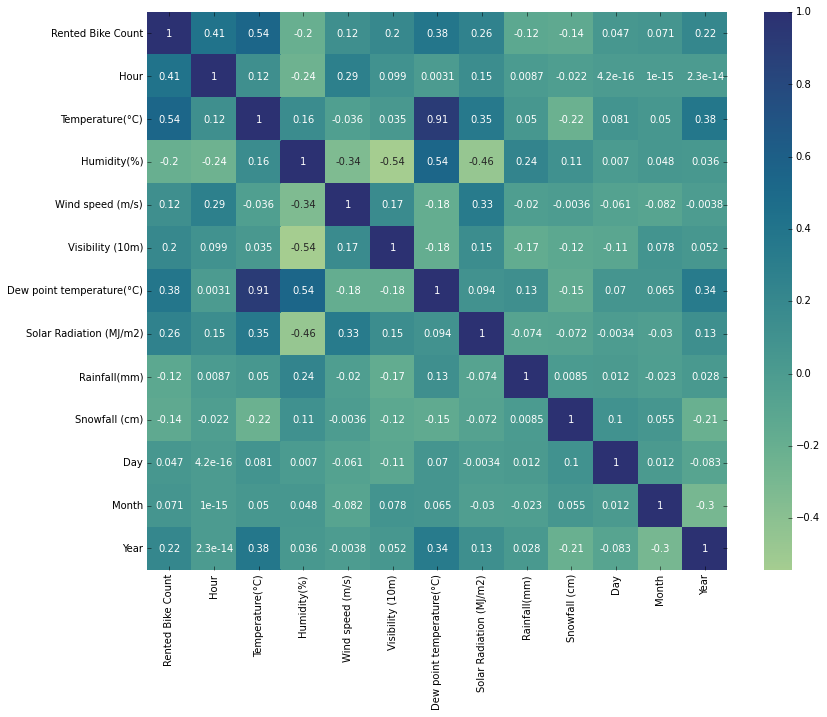

In [68]:
plt.figure(figsize=(13,10)) # Define figure size
sns.heatmap(df.corr(),annot=True,cmap='crest') # seaborn heatmap using correlation matrix

### From the correlation heatmap we can see that the Temperature and Dew point temperature have high correlation 0.91

### To remove multicollinearity between independent variables, I remove the Dew point temperature because it has less correlation with the dependent variable when compared with Temperature 

In [69]:
# Drop Dew point tempearture column 
df=df.drop('Dew point temperature(°C)',axis=1)

## Bivariate Analysis

In [70]:
# create a list of features 
features=list(df.columns)[:-7]

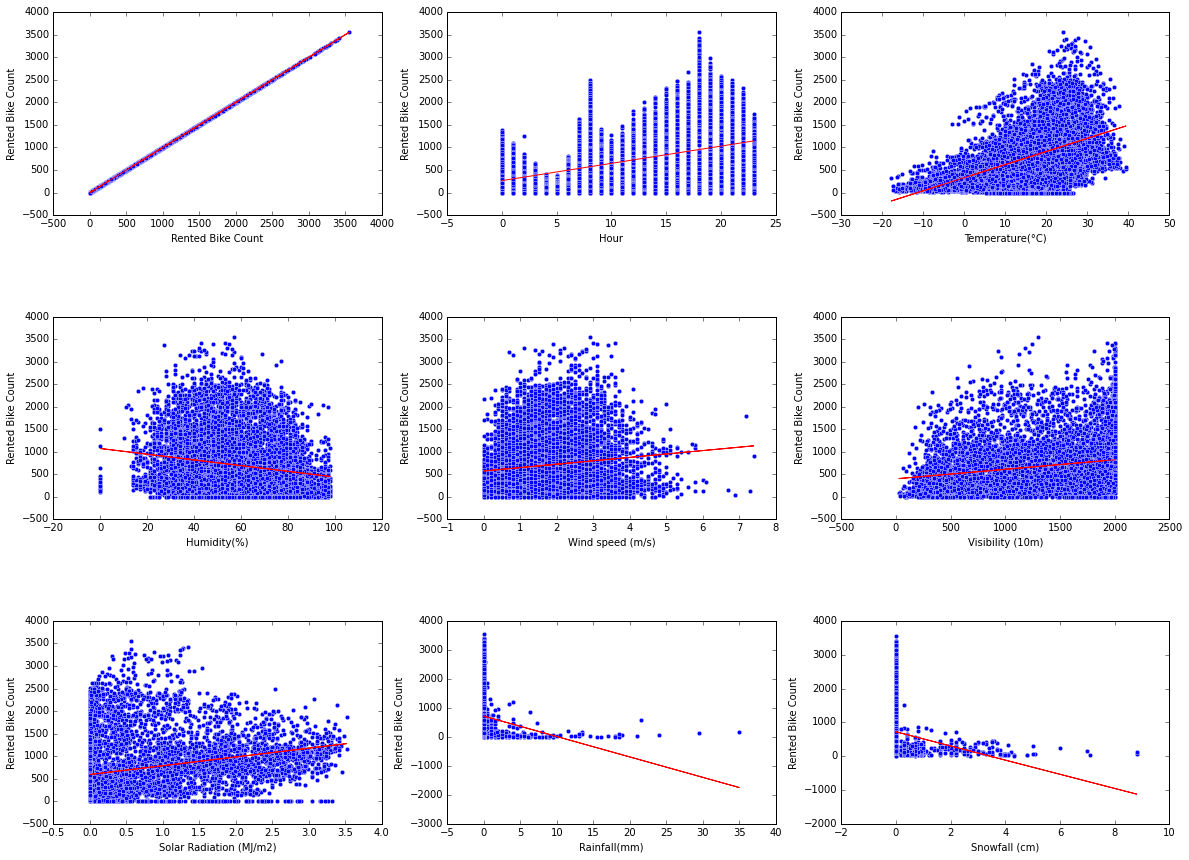

In [71]:
# Plot of Rented Bike Count vs other features
count=1 # initialize a variable
plt.subplots(figsize=(20,20))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Scatterplots of all features", fontsize=18,y=0.95) # title of the plot
for col in features:
  plt.subplot(4,3,count)
  sns.scatterplot(df[col],df['Rented Bike Count']) # Scatterplot of Rented bike count vs other variables
  z=np.polyfit(df[col],df['Rented Bike Count'],1) # plots the trend line
  p=np.poly1d(z)
  plt.plot(df[col],p(df[col]),color="red")
  count+=1
plt.show()

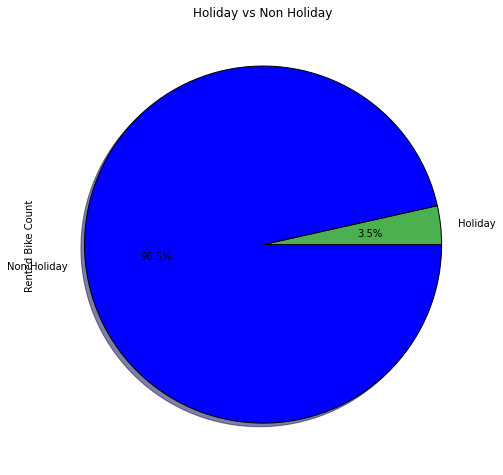

In [72]:
# Plot of Percentage of Rented bike count on holiday and working day
plt.figure(figsize=(10,8)) # define figure size
plt.title('Holiday vs Non Holiday') # Give a Title
df.groupby('Holiday').sum()['Rented Bike Count'].plot.pie(labels=['Holiday','Non Holiday'],shadow=True,colors=['#4CAF50','B'],autopct='%1.1f%%') # Plot sum of rented bike count for holiday vs working day
plt.show()

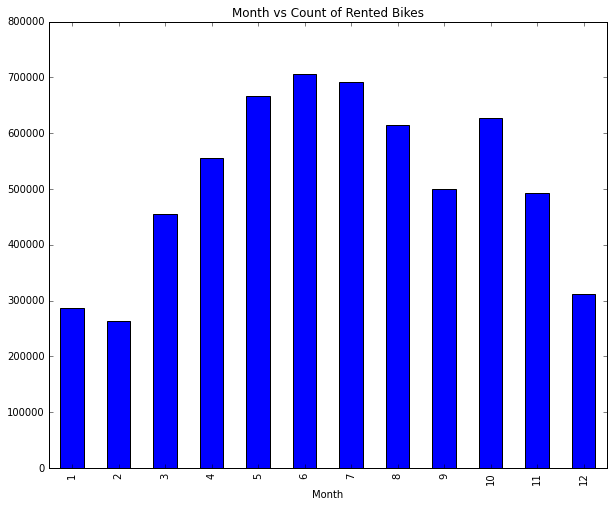

In [73]:
# Total Rented Bikes per each month
plt.figure(figsize=(10,8))
plt.title('Month vs Count of Rented Bikes')
plt.style.use('classic')
df.groupby('Month')['Rented Bike Count'].sum().plot(kind='bar',x='Month',y='Rented_Bikes') # bar plot of number of rented bikes per month

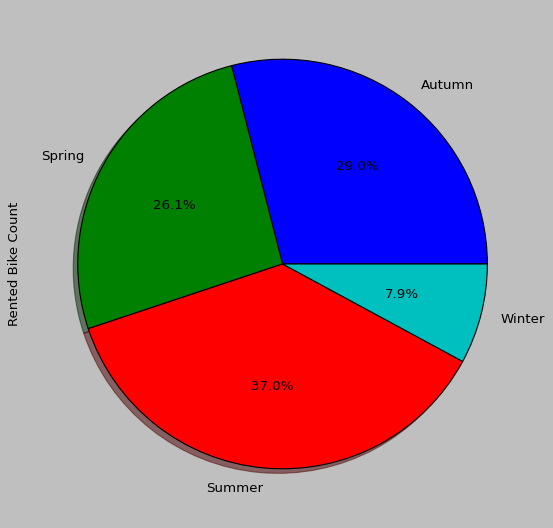

In [74]:
# Number of rented bikes for each season
plt.figure(figsize=(10,8))
df.groupby('Seasons').sum()['Rented Bike Count'].plot.pie(shadow=True,autopct='%1.1f%%') 

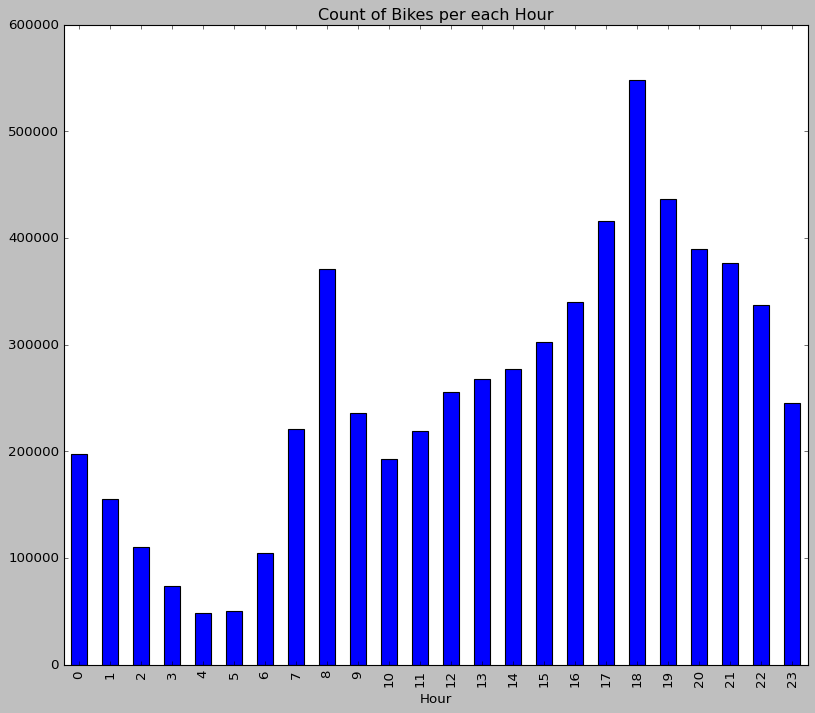

In [75]:
# Number of bikes rented at a particular hour
plt.figure(figsize=(12,10))
plt.title("Count of Bikes per each Hour")
df.groupby('Hour')['Rented Bike Count'].sum().plot(kind='bar',x='Day',y='Rented_Bikes')

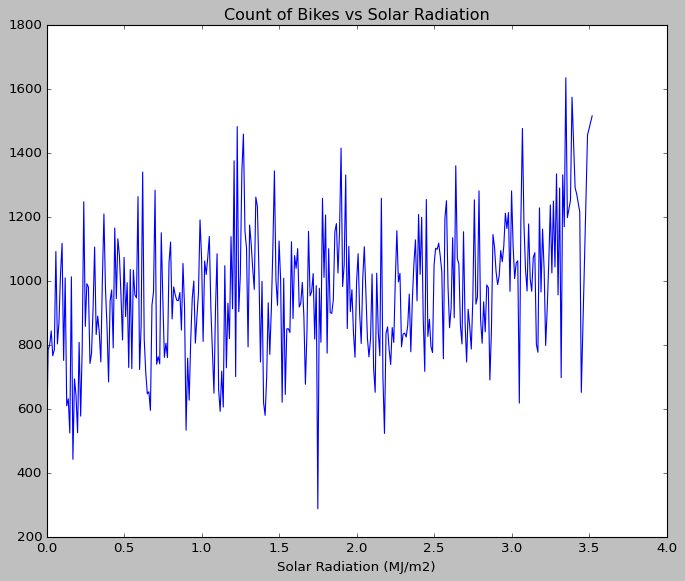

In [76]:
# Plot of Rented bike count vs Solar Radiation
plt.figure(figsize=(10,8))
plt.title("Count of Bikes vs Solar Radiation")
df.groupby('Solar Radiation (MJ/m2)').mean()['Rented Bike Count'].plot()

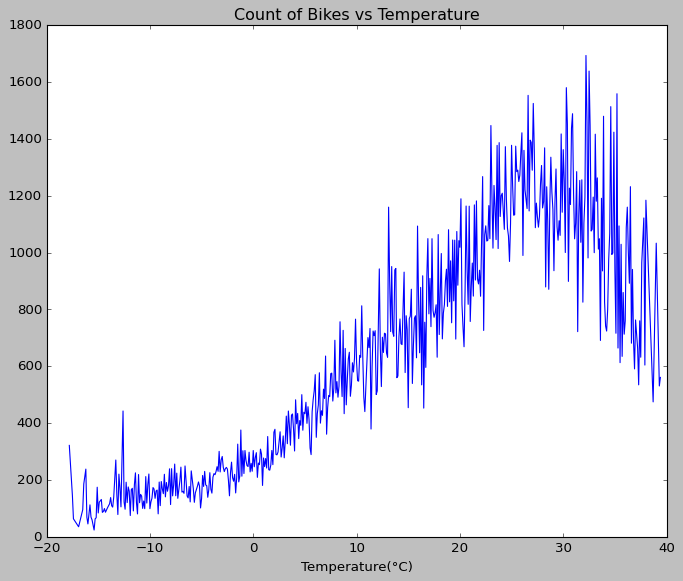

In [77]:
# plot of Number of rented bikes vs Temperature
plt.figure(figsize=(10,8))
plt.title("Count of Bikes vs Temperature")

df.groupby('Temperature(°C)').mean()['Rented Bike Count'].plot()

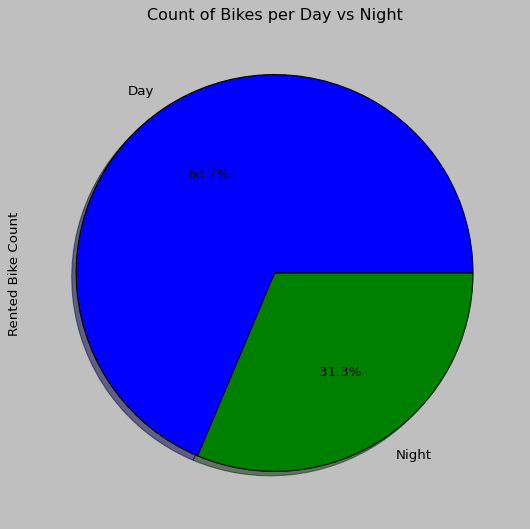

In [78]:
# Plot of Percentage of rented bikes at Day and Night 
plt.figure(figsize=(8,8))
plt.title("Count of Bikes per Day vs Night")
df.groupby('label_day_night').sum()['Rented Bike Count'].plot.pie(shadow=True,autopct='%1.1f%%')

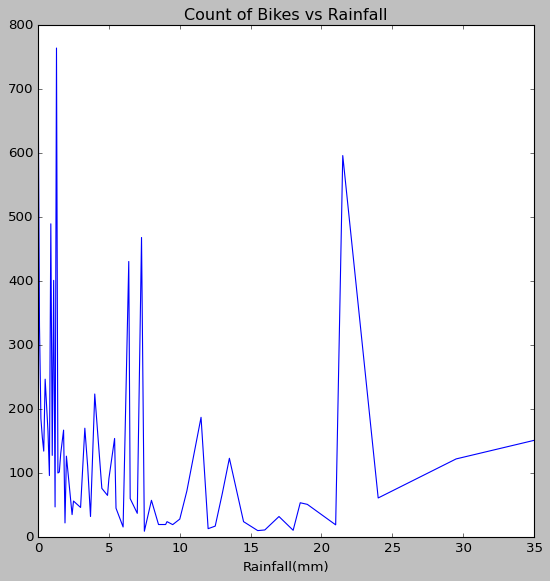

In [79]:
# Plot of Rented Bike count vs Rainfall
plt.figure(figsize=(8,8))
plt.title("Count of Bikes vs Rainfall")
df.groupby('Rainfall(mm)').mean()['Rented Bike Count'].plot()

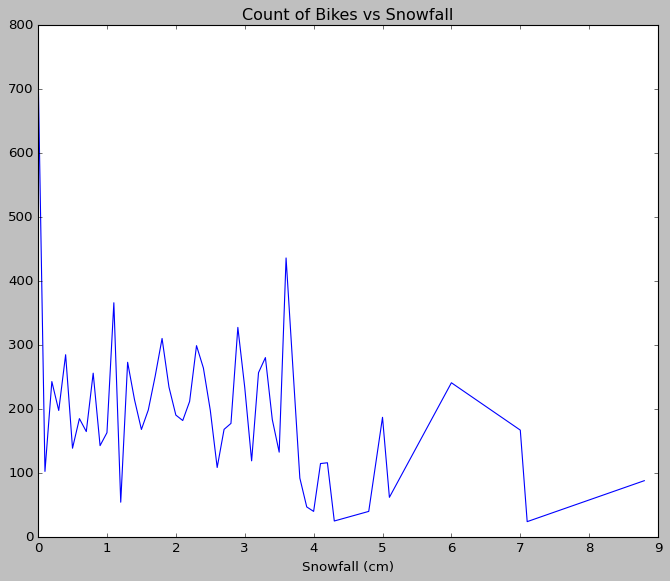

In [80]:
# Plot of Rented Bike Count vs Snowfall
plt.figure(figsize=(10,8))
plt.title("Count of Bikes vs Snowfall")
df.groupby('Snowfall (cm)').mean()['Rented Bike Count'].plot()

In [81]:
# Encoding categorical columns 'Holiday' and 'Functioning Day' with Labelencoder
le=LabelEncoder() # 
df['Holiday']=le.fit_transform(df['Holiday'])
df['Functioning Day']=le.fit_transform(df['Functioning Day'])
df['Year']=le.fit_transform(df['Year']) 

In [82]:
# Create dummies for "Seasons" column
seasons=pd.get_dummies(df['Seasons'])
df=pd.concat([df.drop(['Seasons'],axis=1),seasons],axis=1) # Add the dummies to the dataset using concat function

In [83]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Day,Month,Year,label_day_night,Autumn,Spring,Summer,Winter
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,1,1,12,1,0,Night,0,0,0,1
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,1,12,1,0,Night,0,0,0,1
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,1,1,12,1,0,Night,0,0,0,1
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,1,1,12,1,0,Night,0,0,0,1
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,1,1,12,1,0,Night,0,0,0,1


In [84]:
df[((df['Rented Bike Count']==0) & (df['Functioning Day']==1))]

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Day,Month,Year,label_day_night,Autumn,Spring,Summer,Winter


In [85]:
# df=df[df['Rented Bike Count']!=0]

In [86]:
# y=np.log(df['Rented Bike Count']+1)

In [87]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Day,Month,Year,label_day_night,Autumn,Spring,Summer,Winter
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,1,1,12,1,0,Night,0,0,0,1
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,1,12,1,0,Night,0,0,0,1
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,1,1,12,1,0,Night,0,0,0,1
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,1,1,12,1,0,Night,0,0,0,1
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,1,1,12,1,0,Night,0,0,0,1


In [88]:
y=(df['Rented Bike Count'])**0.5

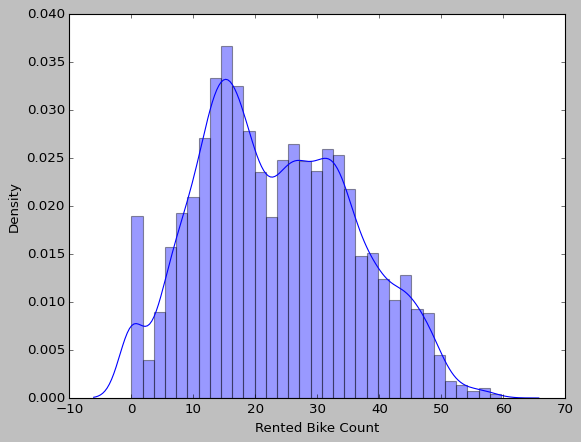

In [89]:
sns.distplot(y)

In [90]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Day,Month,Year,label_day_night,Autumn,Spring,Summer,Winter
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,1,1,12,1,0,Night,0,0,0,1
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,1,12,1,0,Night,0,0,0,1
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,1,1,12,1,0,Night,0,0,0,1
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,1,1,12,1,0,Night,0,0,0,1
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,1,1,12,1,0,Night,0,0,0,1


In [91]:
df=df.drop("label_day_night",axis=1)

In [92]:
features=['Hour','Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)','Holiday','Functioning Day','Day','Month','Year','Autumn','Spring','Summer','Winter']

In [93]:
X=df[features]

In [94]:
X.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Day,Month,Year,Autumn,Spring,Summer,Winter
0,0,-5.2,37,2.2,2000,0.0,0.0,0.0,1,1,12,1,0,0,0,0,1
1,1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,1,12,1,0,0,0,0,1
2,2,-6.0,39,1.0,2000,0.0,0.0,0.0,1,1,12,1,0,0,0,0,1
3,3,-6.2,40,0.9,2000,0.0,0.0,0.0,1,1,12,1,0,0,0,0,1
4,4,-6.0,36,2.3,2000,0.0,0.0,0.0,1,1,12,1,0,0,0,0,1


In [95]:
# Standardization
sc=StandardScaler()
X=sc.fit_transform(X)